# YOLOv1 Implementation

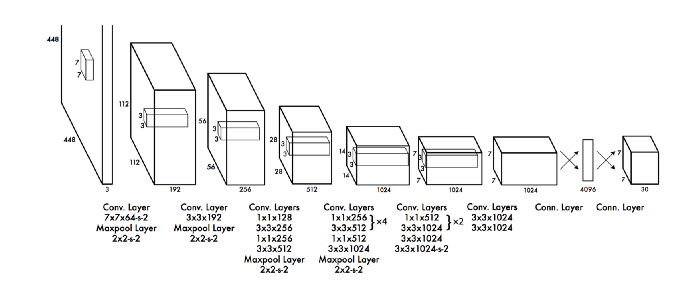

# Dependencies

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 
import numpy as np
import ctypes
import os
from torchvision import models
from PIL import Image
from pprint import pprint

# Neck

In [2]:
class YOLOv1(nn.Module):
    def __init__(self, class_names, grid_size, img_size=(448,448)):
        super(YOLOv1,self).__init__()
        self.num_bbox = 2
        self.input_size = img_size
        self.class_names = class_names
        self.num_classes = len(class_names.keys())        
        self.grid = grid_size
        
        
        # load in pretrained ResNet
        resnet50 = models.resnet50(pretrained=True)
                #freezing the model layzers
        for param in resnet50.parameters():
            param.requires_grad = False
        self.extraction_layers = nn.Sequential(*list(resnet50.children())[:-2])
        


        # the neck
        self.final_conv = nn.Sequential(
            nn.Conv2d(2048, 1024, 3, bias=False),
            nn.BatchNorm2d(1024),
            nn.Dropout2d(p=0.5),
            nn.LeakyReLU(0.1),

            nn.Conv2d(1024, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.1),

            nn.AdaptiveAvgPool2d((7,7))
        )
        # the head
        self.linear_layers = nn.Sequential(
            nn.Linear(50176, 4096, bias=False),
            nn.BatchNorm1d(4096),
            nn.Dropout(p=0.1), 
            nn.LeakyReLU(0.1),

            nn.Linear(4096, self.grid*self.grid*(5*self.num_bbox+self.num_classes),bias=False),
            nn.BatchNorm1d(self.grid*self.grid*(5*self.num_bbox+self.num_classes)),
            nn.Sigmoid()
        )
    def forward(self, x):
        actv = self.extraction_layers(x)
        actv = self.final_conv(actv)

        lin_inp = torch.flatten(actv)
        lin_inp = lin_inp.view(x.size()[0],-1) #resize it so that it is flattened by batch        
        lin_out = self.linear_layers(lin_inp)
        det_tensor = lin_out.view(-1,self.grid,self.grid,((self.num_bbox * 5) + self.num_classes))

        return det_tensor 

# My Code



class yolo_v1(nn.Module):
    def __init__(self, fc_in):
        super(yolo_v1, self).__init__()
        self.num_bbox = 2
        self.input_size = img_size
        self.class_names = class_names
        self.num_classes = len(class_names.keys())        
        self.grid = grid_size

        self.main_conv = nn.Sequential(
                    # first block
                    nn.BatchNorm1d(fc_in),
                    nn.Conv2d(fc_in, 64, 7),
                    nn.LeakyReLU(0.1),
             
                    nn.MaxPool2d(2, stride = 2),

                    # second block
                    nn.BatchNorm1d(64),
                    nn.Conv2d(64, 192, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.MaxPool2d(2, stride = 2),

                    # third block
                    nn.BatchNorm1d(192),
                    nn.Conv2d(192, 128, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(128),
                    nn.Conv2d(128, 256, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(256),
                    nn.Conv2d(256, 256, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(256),
                    nn.Conv2d(256, 512, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.MaxPool2d(2, stride = 2),

                    # fourth block
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 256, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(256),
                    nn.Conv2d(256, 512, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 256, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(256),
                    nn.Conv2d(256, 512, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 256, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(256),
                    nn.Conv2d(256, 512, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 256, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(256),
                    nn.Conv2d(256, 512, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 512, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 1024, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.MaxPool2d(2, stride = 2),

                    # fifth block
                    nn.BatchNorm1d(1024),
                    nn.Conv2d(1024, 512, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 1024, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(1024),
                    nn.Conv2d(1024, 512, 1),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 1024, 3),
                    nn.LeakyReLU(0.1),
                    
                    nn.BatchNorm1d(1024),
                    nn.Conv2d(1024, 1024, 3),
                    nn.LeakyReLU(0.1),
             
                    nn.BatchNorm1d(512),
                    nn.Conv2d(512, 1024, 3, stride = 2),
                    nn.LeakyReLU(0.1),

                    # sixth block
                    nn.BatchNorm1d(1024),
                    nn.Conv2d(1024, 1024, 3),
                    nn.LeakyReLU(0.1),
                     
                    nn.BatchNorm1d(1024),
                    nn.Conv2d(1024, 1024, 3),
                    nn.LeakyReLU(0.1),
            
                    nn.AdaptiveAvgPool2d((7,7))
        )
        self.linear_layers = nn.Sequential(  
                    S, B, C = self.grid, self.num_bbox, self.num_classes
            
                    nn.Linear(50176, 4096),
                    nn.BatchNorm1d(4096),
                    nn.LeakyReLU(0.1),
                    nn.Dropout(p = 0.1),
                    nn.Linear(4096, S * S * (5 * B + C)),
                    nn.Sigmoid()
        )
        
    def forward(self, x):
                    S, B, C = self.grid, self.num_bbox, self.num_classes
                    x = self.main_conv(x)
                    x = torch.flatten(x)
                    x = self.linear_layers(x)
                    x_tensor = x.view(-1, S, S, ((B * 5) + 2))
        return x_tensor

In [3]:
classes = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5,
               'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11,
               'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16,
               'sofa': 17, 'train': 18, 'tvmonitor': 19}

In [4]:
VOC_CLASSES = (    # always index 0
    'aeroplane', 'bicycle', 'bird', 'boat',
    'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse',
    'motorbike', 'person', 'pottedplant',
'sheep', 'sofa', 'train', 'tvmonitor')

In [5]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable
from YOLOv1_VOC import VOCDataset
from YOLOv1_loss import Loss 

import os
import numpy as np
import math
from datetime import datetime

In [6]:
 def encode(self, boxes, labels):
        """ Encode box coordinates and class labels as one target tensor.
        Args:
            boxes: (tensor) [[x1, y1, x2, y2]_obj1, ...], normalized from 0.0 to 1.0 w.r.t. image width/height.
            labels: (tensor) [c_obj1, c_obj2, ...]
        Returns:
            An encoded tensor sized [S, S, 5 x B + C], 5=(x, y, w, h, conf)
        """

        S, B, C = self.S, self.B, self.C
        N = 5 * B + C

        target = torch.zeros(S, S, N)
        cell_size = 1.0 / float(S)
        boxes_wh = boxes[:, 2:] - boxes[:, :2] # width and height for each box, [n, 2]
        boxes_xy = (boxes[:, 2:] + boxes[:, :2]) / 2.0 # center x & y for each box, [n, 2]
        for b in range(boxes.size(0)):
            xy, wh, label = boxes_xy[b], boxes_wh[b], int(labels[b])

            ij = (xy / cell_size).ceil() - 1.0
            i, j = int(ij[0]), int(ij[1]) # y & x index which represents its location on the grid.
            x0y0 = ij * cell_size # x & y of the cell left-top corner.
            xy_normalized = (xy - x0y0) / cell_size # x & y of the box on the cell, normalized from 0.0 to 1.0.

            # TBM, remove redundant dimensions from target tensor.
            # To remove these, loss implementation also has to be modified.
            for k in range(B):
                s = 5 * k
                target[j, i, s  :s+2] = xy_normalized
                target[j, i, s+2:s+4] = wh
                target[j, i, s+4    ] = 1.0
            target[j, i, 5*B + label] = 1.0

        return target

### Train 

In [7]:

from YOLOv1_loss import Loss
from dataset import COCODataset, image_list
from transform import preset_transform, preset_transform_voc
from boxlist import BoxList


def collate_data(batch):
    batch = list(zip(*batch))
    imgs = image_list(batch[0], 32).tensors #size divisible by 32 because of resnet downsampling
    #print(imgs.shape)
    grid = 7
    #print(batch)
    
    targets = batch[1]
    targets = torch.stack(targets)
    ids = batch[2]    


    return imgs, targets, ids



#train_set = COCODataset(r'E:\Datasets\COCO', 'train', preset_transform())
train_set = COCODataset(r"C:\Users\sam\Downloads\VOCtrainval_2012\VOCdevkit\VOC2012", 'train', preset_transform_voc())

train_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=32,
        shuffle=True,
        num_workers=0,
        collate_fn=collate_data)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [22]:

from YOLOv1_loss import Loss
from dataset import COCODataset, image_list
from transform import preset_transform, preset_transform_voc
from boxlist import BoxList

def collate_data(batch):
    batch = list(zip(*batch))
    imgs = image_list(batch[0], 32).tensors #size divisible by 32 because of resnet downsampling
    targets = batch[1]
    targets = torch.stack(targets)
    ids = batch[3]    

    return imgs, targets, ids

test_set = COCODataset(r"C:\Users\sam\Downloads\VOCtrainval_2012\VOCdevkit\VOC2012", 'test', preset_transform_voc(train=False))
test_loader = torch.utils.data.DataLoader(
        test_set,
        batch_size=1,
        shuffle=False,
        num_workers=0,
        collate_fn=collate_data)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [23]:
test_set.get_image_meta(0)['id']

2008000200

In [10]:
from YOLOv1_loss import Loss
from dataset import COCODataset, image_list
from transform import preset_transform, preset_transform_voc
from boxlist import BoxList
from PIL import Image
import torchvision
  


def collate_data(batch):
    x = batch[0][0]


    x = F.interpolate(x, size=448)

    x = x.permute(0, 2, 1)
    x = F.interpolate(x, size=448)
    x = x.permute(0, 2, 1)
    x.unsqueeze_(0)

    
    
    return x

path = r"C:\Users\sam\Downloads\test"
vos_set = torchvision.datasets.ImageFolder(
    root = path,
    transform = torchvision.transforms.ToTensor()
)
vos_loader = torch.utils.data.DataLoader(
        vos_set,
        batch_size=1,
        shuffle=False,
        num_workers=0,
        collate_fn=collate_data)

In [11]:
test = torch.load('./YOLOv1_checkpoint.pt')


In [12]:


from torch.nn.utils import clip_grad_norm_


from apex import amp
from torch.cuda.amp import GradScaler, autocast
import time

In [13]:


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

init_lr = .001
base_lr = .01
def update_lr(optimizer, epoch):
    if epoch == 0:
        lr = init_lr 
    elif epoch == 40:
        lr = base_lr
    elif epoch == 75:
        lr = 0.001
    elif epoch == 105:
        lr = 0.0001
    else:
        return
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

loss_fn = Loss(feature_size=7)

epoch = 135
model = YOLOv1(classes, grid_size=7, img_size=(448,448)).to(device) 


params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(params, lr=init_lr, weight_decay=0.0005, momentum= 0.9)



print_freq = 5
tb_log_freq = 5


def train(epoch, model, optimizer):
    
    total_loss = 0
    total_batch = 0
    model.eval()
    #model.train()
    tic = time.process_time()

    scaler = GradScaler()
    
    count = 0
    with torch.no_grad():
        for i in range(epoch):
            update_lr(optimizer, i)
            lr = get_lr(optimizer)
            for imgs, targets, _ in test_loader:
                # Load data as a batch.
                optimizer.zero_grad()
                batch_size_this_iter = imgs.size(0)
                imgs = Variable(imgs)
                #print(shape)
                #targets = Variable(targets)



    #            targets = [target[0] for target in targets]

                imgs = imgs.to(device)
               #imgs, targets = imgs.cuda(), targets.cuda()

                # Forward to compute loss.
                targets = targets.to(device)
                preds = model(imgs)
                #print(preds.shape, targets.shape)
                loss = loss_fn(preds, targets)
                loss_this_iter = loss.item()
                total_loss += loss_this_iter * batch_size_this_iter
                total_batch += batch_size_this_iter

                # Backward to update model weight.

                #clip_grad_norm_(model.parameters(), 10)
                #loss.backward()
                #optimizer.step()

                count += 1
            # Print current loss.
                if count%250 == 0:
                        toc = time.process_time()
                        print("loss:", loss, "total loss:", total_loss, "total batch:", total_batch)
                        print(i, "loss this iter", loss_this_iter)
                        print((toc - tic)/60, "Minutes")

            checkpoint = {
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            }
            torch.save(checkpoint, './YOLOv1_val_checkpoint.pt')



#train(epoch, model, optimizer)
#save = torch.save(model, './YOLOv1_val.pt')

cuda:0


In [14]:
model = YOLOv1(classes, grid_size=7, img_size=(448,448))
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=.001, weight_decay=0.0005, momentum= 0.9)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load('./YOLOv1_checkpoint.pt')

model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])


In [15]:
import dataset

In [24]:
import predict
import json
def test(model):
    model.eval()
    scaler = GradScaler()
    result = []
    with torch.no_grad():
        
        #for imgs, targets, ids in vos_loader:
        for imgs, targets, ids in test_loader:
            orig_id = test_set.get_image_meta(ids[0])["id"]
            print(orig_id)
            # Load data as a batch.
            imgs = Variable(imgs)
            #imgs = imgs.to(device)
            # Forward to predict.
            preds = model(imgs)
            preds = preds.cpu()
            boxes,cls_indexs,probs = predict.decoder(preds)
            for i,box in enumerate(boxes):
                x1 = box[0].item()
                x2 = box[2].item() 
                y1 = box[1].item() 
                y2 = box[3].item() 
                cls_index = cls_indexs[i]
                cls_index = int(cls_index) # convert LongTensor to int
                prob = probs[i]
                prob = float(prob)
                result.append([orig_id, (x1,y1),(x2,y2),VOC_CLASSES[cls_index],prob])
            
    with open('voc_test_map.json', 'w') as outfile:
        json.dump(result, outfile)



In [25]:
test(model)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sam\\Downloads\\VOCtrainval_2012\\VOCdevkit\\VOC2012\\test2017\\2008_000200.jpg'

In [ ]:
torch.cuda.empty_cache()

In [ ]:
#print(results) 

In [ ]:
# from evaluate15 import do_coco_evaluation
# from evaluate15 import evaluate_box_proposals

# torch.cuda.empty_cache()



# model.eval()
# preds_zip = {}
# predictions = []
# with torch.no_grad():
#     for imgs, targets, ids in test_loader:

#         orig_id = test_set.get_image_meta(ids[0])["id"]
#         w = test_set.get_image_meta(ids[0])["width"]
#         h = test_set.get_image_meta(ids[0])["height"]
#         size = [w, h]
        
#         imgs = Variable(imgs)
#         preds = model(imgs)
#         preds = preds.cpu()
#         boxes,cls_indexs,probs = predict.decoder(preds)
        
        
#         boxes2bl = []
#         classes = []
#         for i,box in enumerate(boxes):
#                 x1 = box[0].item()
#                 x2 = box[2].item() 
#                 y1 = box[1].item() 
#                 y2 = box[3].item() 
#                 cls_index = cls_indexs[i]
#                 cls_index = int(cls_index) # convert LongTensor to int
#                 prob = probs[i]
#                 prob = float(prob)
#                 boxes2bl.append([x1,y1,x2,y2])
#                 classes.append([orig_id,VOC_CLASSES[cls_index],prob])
        
# #         sizes = []
# #         for j in range(len(boxes2bl)):
# #             sizes.append(size)
#         new_boxes = BoxList(boxes2bl, size)
        
#         #preds_zip.update({ids: p for ids, p in zip(ids, new_boxes)})
#         #print(ids[0])
#        # ids = list(sorted(preds.keys()))
#         predictions.append(new_boxes)

        
#     results = do_coco_evaluation(
#     test_set,
#     predictions,
#     box_only=True,
#     output_folder = r"C:\Users\sam\Documents\DeepLearningFinalProject\YOLOv1_03\eval",
#     iou_types= 'bbox',
#     expected_results = (),
#     expected_results_sigma_tol=4)    
#     #evaluate15(test_set, predictions, 'eval', r"C:\Users\sam\Documents\DeepLearningFinalProject\YOLOv1_03.py\eval")

In [ ]:
from pycocotools.cocoeval import COCOeval
from coco_eval import COCOGenerator

In [ ]:
generator=COCOGenerator(r"C:\Users\sam\Downloads\VOCtrainval_2012\VOCdevkit\VOC2012\train2017",r"C:\Users\sam\Downloads\VOCtrainval_2012\VOCdevkit\VOC2012\annotations\instances_train2017.json")

In [ ]:
# torch.cuda.empty_cache()



# model.eval()
# results = []
# with torch.no_grad():
#        for imgs, targets, ids in test_loader:

#         orig_id = test_set.get_image_meta(ids[0])["id"]
#         w = test_set.get_image_meta(ids[0])["width"]
#         h = test_set.get_image_meta(ids[0])["height"]
#         size = [w, h]
        
#         imgs = Variable(imgs)
#         preds = model(imgs)
#         preds = preds.cpu()
        
#         boxes,cls_indexs,probs = predict.decoder(preds)
        
        
#         boxes2bl = []
#         classes = []
        
        
#         for i,box in enumerate(boxes):
#                 x1 = box[0].item() * w
#                 width = ((box[2].item() - box[0].item()) * w)
#                 y1 = box[1].item() * h
#                 height = ((box[3].item() - box[1].item()) * h)
#                 cls_index = cls_indexs[i]
#                 cls_index = int(cls_index) # convert LongTensor to int
#                 prob = probs[i]
#                 prob = float(prob)
#                 box_r = [x1,y1,width,height]
#                 image_result = {
#                 'image_id'    : ids[0],
#                 'category_id' : VOC_CLASSES[cls_index],
#                 'score'       : prob,
#                 'bbox'        : box_r,
#                 }
        
#                 results.append(image_result)

#     json.dump(results, open('coco_bbox_results.json', 'w'), indent=4)
#     # json.dump(image_ids, open('{}_processed_image_ids.json'.format(generator.set_name), 'w'), indent=4)

#     # load results in COCO evaluation tool
#     coco_true = generator.coco
#     coco_pred = coco_true.loadRes('coco_bbox_results.json')

#     # run COCO evaluation
#     coco_eval = COCOeval(coco_true, coco_pred, 'bbox')
#     coco_eval.params.imgIds = image_ids
#     coco_eval.evaluate()
#     coco_eval.accumulate()
#     coco_eval.summarize()

In [ ]:
from coco_eval import evaluate_coco
#import tensorflow as tf

In [ ]:
#evaluate_coco(generator, model, threshold=0.05)

In [ ]:
#from detect import decode
from evaluate4 import evaluate
import collections

from collections import defaultdict 

In [ ]:
import os
arr = os.listdir(r"C:\Users\sam\Downloads\mAP_data\Annotations")


In [ ]:
targets2 =defaultdict(list)
#im_nums = r"C:\Users\sam\Downloads\VOCtrainval_2012\VOCdevkit\VOC2012\ImageSets\Main\val.txt"
label_path = r"C:\Users\sam\Downloads\mAP_data\Annotations"
annotations = []
# for 
#     with open(label_path, 'r') as f:
#         lines = f.readlines()
#         print(lines)
for line in arr:
    with open(os.path.join(label_path, line), 'r') as f:
        temp = f.readlines()
        print(temp)
        line2 = line[:-4]
        line3 = line2[:4] + line2[5:]
        temp2 = line3 + " " + temp[0]
        anno = temp2.strip().split()
        annotations.append(anno)
    
# Prepare ground-truth data.
image_fnames = []
for anno in annotations:
    filename = anno[0]
    image_fnames.append(filename)
   
    num_boxes = (len(anno) - 1) // 5
    for b in range(num_boxes):
        x1 = float(anno[5*b + 1])
        y1 = float(anno[5*b + 2])
        x2 = float(anno[5*b + 3])
        y2 = float(anno[5*b + 4])

        class_label = int(anno[1])
        class_name = VOC_CLASSES[class_label]
        targets2[(filename, class_name)].append([x1, y1, x2, y2])

In [ ]:
print(line2)

In [ ]:
predictions = defaultdict(list)
print(test)

model.eval()
scaler = GradScaler()
result = []
with torch.no_grad():
    for imgs, targets, ids in test_loader:

        orig_id = test_set.get_image_meta(ids[0])["id"]
        w = test_set.get_image_meta(ids[0])["width"]
        h = test_set.get_image_meta(ids[0])["height"]
    #         size = [w, h]

        imgs = Variable(imgs)
        preds = model(imgs)
        preds = preds.cpu()
        boxes, class_names, probs = predict.decoder(preds)
        for box, class_name, prob in zip(boxes, class_names, probs):
            x1 = box[0].item() * w
            x2 = box[2].item() * w
            y1 = box[1].item() * h
            y2 = box[3].item() * h
            #print(class_name.item())
            cls_nm = VOC_CLASSES[int(class_name.item())]
            predictions[cls_nm].append([orig_id, prob, x1, y1, x2, y2])


print('Evaluate the detection result...')

#evaluate(preds, targets, class_names=VOC_CLASSES)

In [ ]:
def evaluate_00(preds,targets,class_names,threshold=0.5):
    """ Compute mAP metric.
    Args:
        preds: (dict) {class_name_1: [[filename, prob, x1, y1, x2, y2], ...], class_name_2: [[], ...], ...}.
        targets: (dict) {(filename, class_name): [[x1, y1, x2, y2], ...], ...}.
        class_names: (list) list of class names.
        threshold: (float) threshold for IoU to separate TP from FP.
    Returns:
        (list of float) list of average precision (AP) for each class.
    """
    # For mAP computation, you can find a great explaination below.
    # https://github.com/rafaelpadilla/Object-Detection-Metrics

    aps = [] # list of average precisions (APs) for each class.

    for class_name in class_names:
        class_preds = preds[class_name] # all predicted objects for this class.
        if len(class_preds) == 0:
            print("test")
            ap = 0.0 # if no box detected, assigne 0 for AP of this class.
            print('---class {} AP {}---'.format(class_name, ap))
            aps.append(ap)
            break

        image_fnames = [pred[0]  for pred in class_preds]
       # print(image_fnames)
        probs        = [pred[1].item()  for pred in class_preds]
        boxes        = [pred[2:] for pred in class_preds]

        # Sort lists by probs.
        sorted_idxs = np.argsort(probs)[::-1]
        image_fnames = [image_fnames[i] for i in sorted_idxs]
        boxes        = [boxes[i]        for i in sorted_idxs]


        # Compute total number of ground-truth boxes. This is used to compute precision later.
        num_gt_boxes = 0
        for (filename_gt, class_name_gt) in targets:
            if class_name_gt == class_name:
                num_gt_boxes += len(targets[filename_gt, class_name_gt])
        
        # Go through sorted lists, classifying each detection into TP or FP.
        num_detections = len(boxes)
        #print(num_detections)
       # print(num_detections)
        tp = np.zeros(num_detections) # if detection `i` is TP, tp[i] = 1. Otherwise, tp[i] = 0.
        fp = np.ones(num_detections)  # if detection `i` is FP, fp[i] = 1. Otherwise, fp[i] = 0.
       # print(len(tp), fp)
        for det_idx, (filename, box) in enumerate(zip(image_fnames, boxes)):
            #print(filename, class_name)
            if (filename, class_name) in targets:
                print(filename, class_name)
                boxes_gt = targets[(filename, class_name)]
                print("if")
                for box_gt in boxes_gt:
                    # Compute IoU b/w/ predicted and groud-truth boxes.
                    inter_x1 = max(box_gt[0], box[0])
                    inter_y1 = max(box_gt[1], box[1])
                    inter_x2 = min(box_gt[2], box[2])
                    inter_y2 = min(box_gt[3], box[3])
                    inter_w = max(0.0, inter_x2 - inter_x1 + 1.0)
                    inter_h = max(0.0, inter_y2 - inter_y1 + 1.0)
                    inter = inter_w * inter_h
                    print(inter)
                    area_det = (box[2] - box[0] + 1.0) * (box[3] - box[1] + 1.0)
                    area_gt = (box_gt[2] - box_gt[0] + 1.0) * (box_gt[3] - box_gt[1] + 1.0)
                    union = area_det + area_gt - inter

                    iou = inter / union
                    print(iou)
                    if iou >= threshold:
                        tp[det_idx] = 1.0
                        fp[det_idx] = 0.0

                        boxes_gt.remove(box_gt) # each ground-truth box can be assigned for only one detected box.
                        if len(boxes_gt) == 0:
                            del targets[(filename, class_name)] # remove empty element from the dictionary.

                        break

            else:
                pass # this detection is FP.

        # Compute AP from `tp` and `fp`.
        tp_cumsum = np.cumsum(tp)
        fp_cumsum = np.cumsum(fp)

        eps = np.finfo(np.float64).eps
        precision = tp_cumsum / np.maximum(tp_cumsum + fp_cumsum, eps)
        recall = tp_cumsum / float(num_gt_boxes)

        ap = compute_average_precision(recall, precision)
        print('---class {} AP {}---'.format(class_name, ap))
        aps.append(ap)

    # Compute mAP by averaging APs for all classes.
    print('---mAP {}---'.format(np.mean(aps)))

    return aps

In [ ]:
def compute_average_precision(recall, precision):
    """ Compute AP for one class.
    Args:
        recall: (numpy array) recall values of precision-recall curve.
        precision: (numpy array) precision values of precision-recall curve.
    Returns:
        (float) average precision (AP) for the class.
    """
    # AP (AUC of precision-recall curve) computation using all points interpolation.
    # For mAP computation, you can find a great explaination below.
    # https://github.com/rafaelpadilla/Object-Detection-Metrics

    recall = np.concatenate(([0.0], recall, [1.0]))
    precision = np.concatenate(([0.0], precision, [0.0]))

    for i in range(precision.size - 1, 0, -1):
        precision[i - 1] = max(precision[i -1], precision[i])

    ap = 0.0 # average precision (AUC of the precision-recall curve).
    for i in range(precision.size - 1):
        ap += (recall[i + 1] - recall[i]) * precision[i + 1]

    return ap

In [ ]:
evaluate_00(predictions, targets3, class_names=VOC_CLASSES)

In [ ]:
for filename, class_name in targets3: 
    print(filename, class_name)

In [ ]:
import json

with open(r"C:\Users\sam\Downloads\VOCtrainval_2012\VOCdevkit\VOC2012\annotations\instances_test2017.json") as json_file:
    data = json.load(json_file)


In [ ]:
targets3 = defaultdict(list)
for i in range(len(data["annotations"])):
    im_id = data["annotations"][i]['image_id']
    bbox = data["annotations"][i]['bbox']
    class_id = data["annotations"][i]['id']
    x1 = bbox[0]
    x2 = bbox[1]
    x3 = bbox[2]
    x4 = bbox[3]
    class_name = VOC_CLASSES[14]
    print(im_id, class_name)
    targets3[(filename, class_name)].append([x1, y1, x2, y2])

In [ ]:
print(predictions)